In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import matplotlib.dates as mdates
import sympy as sp
from scipy.optimize import curve_fit
import datetime as datetime
Fmt = mdates.DateFormatter('%H%M%S')
%matplotlib widget

In [54]:
loaddirectory = '..\\data\\20231107_alignment\\'
filename = 'HysteresisTest20231107_113036_10.658phi.npy'
data = np.load(loaddirectory+filename, allow_pickle = True)
newdata=np.transpose(data)
# x1,x2,x3,phi,c,l, v, time = newdata

In [55]:
# Create a DataFrame with meaningful column names
df = pd.DataFrame({
    'x1': newdata[0],
    'x2': newdata[1],
    'x3': newdata[2],
    'angle': newdata[3],
    'c': newdata[4],
    'l': newdata[5],
    'v': newdata[6],
    'time': newdata[7]
})

In [56]:
df

,x1,x2,x3,angle,c,l,v,time
0,3.537248,3.521226,4.358959,-0.00013,0.0,0.3,1.5,2023-11-07 11:31:15.518690
1,3.537248,3.532212,4.347972,-0.000111,0.0,0.3,1.5,2023-11-07 11:31:18.043894
2,3.537248,3.542741,4.336985,-0.000093,0.0,0.0,1.5,2023-11-07 11:31:20.521946
3,3.53679,3.554186,4.326456,-0.000074,0.0,0.0,1.5,2023-11-07 11:31:22.888217
4,3.537248,3.564714,4.315928,-0.000056,0.0,0.0,1.5,2023-11-07 11:31:25.286018
5,3.537248,3.574786,4.305399,-0.000037,0.0,0.0,1.5,2023-11-07 11:31:27.667866
6,3.537248,3.585772,4.294412,-0.000019,0.0,0.3,1.5,2023-11-07 11:31:30.097307
7,3.537248,3.596759,4.283425,0.0,0.0,0.3,1.5,2023-11-07 11:31:32.543186
8,3.537248,3.607746,4.273354,0.000019,0.0,0.3,1.5,2023-11-07 11:31:34.908982
9,3.537248,3.618274,4.262368,0.000037,0.0,0.3,1.5,2023-11-07 11:31:37.242404


In [30]:
# 15 samples between max and min angle
#10 iterations
#newdata
len(df['angle'])

150

In [31]:
# Create a dictionary to store smaller columns
column_dict = {}

# Separate the columns into smaller columns
for i in range(10):
    column_dict[f'capacity_{i}'] = df['c'][i * 15: (i + 1) * 15].tolist()
    column_dict[f'angle_{i}'] = df['angle'][i * 15: (i + 1) * 15].tolist()
    column_dict[f'time_{i}'] = df['time'][i * 15: (i + 1) * 15].tolist()

In [39]:
column_dict

{'capacity_0': [6.2036e-11,
  6.1814e-11,
  6.1635e-11,
  6.15011e-11,
  6.14059e-11,
  6.1316e-11,
  6.1252e-11,
  6.123409999999999e-11,
  6.12666e-11,
  6.1398e-11,
  6.1552e-11,
  6.175599999999999e-11,
  6.1998e-11,
  6.23012e-11,
  6.2621e-11],
 'angle_0': [-0.001463846600402192,
  -0.0012547256574875932,
  -0.0010456047145729942,
  -0.0008364837716583954,
  -0.0006273628287437966,
  -0.0004182418858291977,
  -0.00020912094291459897,
  0.0,
  0.00020912094291459875,
  0.0004182418858291975,
  0.0006273628287437965,
  0.0008364837716583954,
  0.001045604714572994,
  0.001254725657487593,
  0.001463846600402192],
 'time_0': [Timestamp('2023-11-02 12:36:09.816682'),
  Timestamp('2023-11-02 12:36:12.245825'),
  Timestamp('2023-11-02 12:36:14.739701'),
  Timestamp('2023-11-02 12:36:17.209878'),
  Timestamp('2023-11-02 12:36:19.599433'),
  Timestamp('2023-11-02 12:36:21.965973'),
  Timestamp('2023-11-02 12:36:24.339801'),
  Timestamp('2023-11-02 12:36:26.761006'),
  Timestamp('2023-11-

In [33]:
#fitting function
def func(angle, A, B, angle_0):
    return A + B*(angle-angle_0)**2

initial_guess = [0, 0, 0]

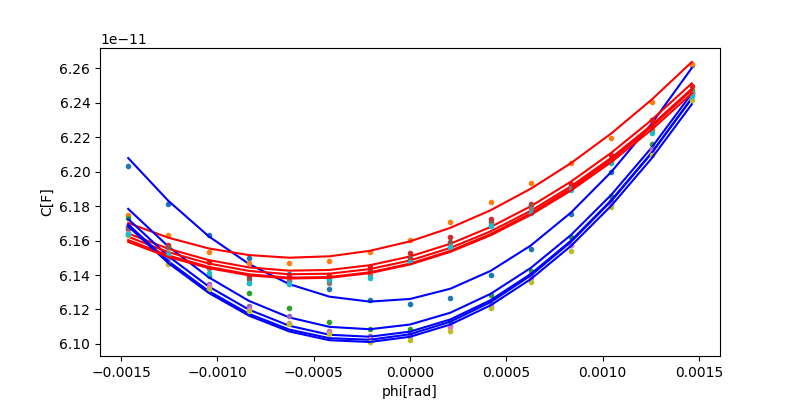

In [34]:
#for capacity to distance 7.0101299782494926e-15/(c*1e-12))*1e6
for i in range(10):
    #fit the data to the points
    parameters, covariance = curve_fit(func, column_dict[f'angle_{i}'], column_dict[f'capacity_{i}'], p0=initial_guess)

    #get fitted parameters
    A_fit, B_fit, angle_0_fit = parameters

    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(155, figsize=(8,4))
    plt.plot(column_dict[f'angle_{i}'], column_dict[f'capacity_{i}'], '.')
    plt.plot(column_dict[f'angle_{i}'], func(column_dict[f'angle_{i}'], A_fit, B_fit, angle_0_fit), color = color)
    plt.xlabel('phi[rad]')
    plt.ylabel('C[F]')
plt.show()

In [18]:
# #for capacity to distance 7.0101299782494926e-15/(c*1e-12))*1e6
# for i in range(10):
#     #fit the data to the points
#     parameters, covariance = curve_fit(func, angle[i], capacity[i], p0=initial_guess)

#     #get fitted parameters
#     A_fit, B_fit, angle_0_fit = parameters
    
# #     minima.append(angle_0_fit)
    
#     # Set the color based on 'i' being even or odd
#     if i % 2 == 0:  # 'i' is even
#         color = 'blue'
#     else:  # 'i' is odd
#         color = 'red'
    
#     plt.figure(99, figsize=(8,4))
#     plt.plot(time_time[i], (7.0101299782494926e-15/(capacity[i]*1e-12))*1e6, '.')
#     #plt.plot(time_time[i], func(angle[i], A_fit, B_fit, angle_0_fit), color = color)
#     plt.xlabel('time')
#     plt.ylabel('d [micron]')
# plt.show()


Set 0: Minimum Capacitance = 6.123409999999999e-11, Corresponding Angle = 0.0
Set 1: Minimum Capacitance = 6.1468e-11, Corresponding Angle = -0.0006273628287437966
Set 2: Minimum Capacitance = 6.1084e-11, Corresponding Angle = 0.0
Set 3: Minimum Capacitance = 6.1389e-11, Corresponding Angle = -0.0006273628287437966
Set 4: Minimum Capacitance = 6.1045e-11, Corresponding Angle = -0.00020912094291459897
Set 5: Minimum Capacitance = 6.1363e-11, Corresponding Angle = -0.0006273628287437966
Set 6: Minimum Capacitance = 6.1029e-11, Corresponding Angle = -0.00020912094291459897
Set 7: Minimum Capacitance = 6.1353e-11, Corresponding Angle = -0.0008364837716583954
Set 8: Minimum Capacitance = 6.1011e-11, Corresponding Angle = -0.00020912094291459897
Set 9: Minimum Capacitance = 6.134899999999999e-11, Corresponding Angle = -0.0006273628287437966


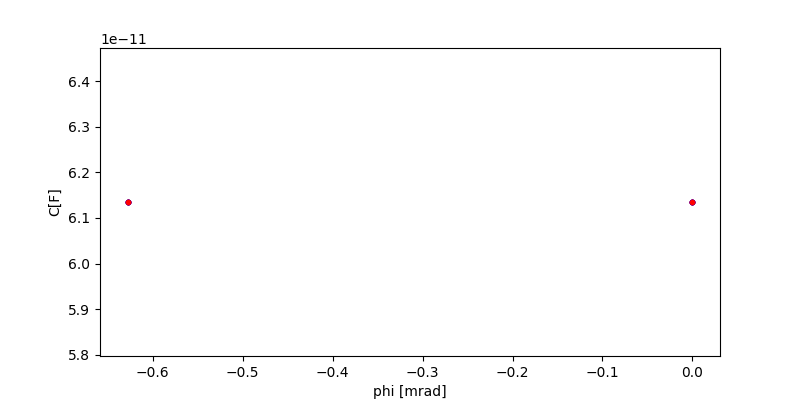

In [37]:
#get min capacitance for corresponding angle

min_capacity_values = []  # List to store minimum capacitance values
corresponding_angles = []  # List to store corresponding angles

for i in range(10):
    cmin = min(column_dict[f'capacity_{i}'])  # Find the minimum capacitance in the current set
    min_capacity_values.append(cmin)  # Store the minimum capacitance in the list
    corresponding_angle = column_dict[f'angle_{i}'][column_dict[f'capacity_{i}'].index(cmin)]  # Find the corresponding angle
    corresponding_angles.append(corresponding_angle)  # Store the corresponding angle in the list
    print(f"Set {i}: Minimum Capacitance = {cmin}, Corresponding Angle = {corresponding_angle}")


    
    
    # Set the color based on 'i' being even or odd
    if i % 2 == 0:  # 'i' is even
        color = 'blue'
    else:  # 'i' is odd
        color = 'red'
    
    plt.figure(109, figsize=(8,4))
    plt.plot(min_values['corresponding_angle']*10**3, min_values['min_capacity'], '.', color = color)
    plt.xlabel('phi [mrad]')
    plt.ylabel('C[F]')
plt.show()

# ((7.0101299782494926e-15/(cmin*1e-12))*1e6)
# capacity[i]


In [36]:
min_capacity_values, corresponding_angles

([6.123409999999999e-11,
  6.1468e-11,
  6.1084e-11,
  6.1389e-11,
  6.1045e-11,
  6.1363e-11,
  6.1029e-11,
  6.1353e-11,
  6.1011e-11,
  6.134899999999999e-11],
 [0.0,
  -0.0006273628287437966,
  0.0,
  -0.0006273628287437966,
  -0.00020912094291459897,
  -0.0006273628287437966,
  -0.00020912094291459897,
  -0.0008364837716583954,
  -0.00020912094291459897,
  -0.0006273628287437966])